# Análise exploratória de dados

### Analisando as notas dos filmes em geral

In [1]:
import pandas as pd

# Importando o arquivo e gerando um dataframe com esse import
# Arquivo de notas dos filmes
notas = pd.read_csv('ml-latest-small/ratings.csv')
notas.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
# Mostra o tamanho do dataframe (linhas, colunas)
notas.shape

(100836, 4)

In [3]:
# Renomeia as colunas de en para pt
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# Mostra somente as notas em formato de Series
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
# Conta a quantidade de cada uma das notas em formato de Series
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [6]:
# Mostra a média das notas
print('Média das notas:', notas['nota'].mean())

# Extraindo a mediana das notas
print('Médiana das notas:', notas['nota'].median())

Média das notas: 3.501556983616962
Médiana das notas: 3.5


In [7]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:>

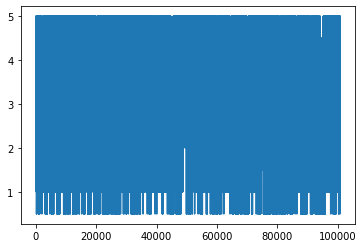

In [8]:
# Mostra em formato de gráfico somente os dados de 1 coluna
# Plot de uma Series brutamente
notas.nota.plot()

<AxesSubplot:ylabel='Frequency'>

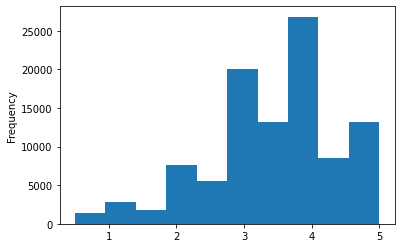

In [9]:
# Mostra em formato de gráfico somente os dados de 1 coluna
# Plot de uma Series com histograma
notas.nota.plot(kind='hist')

In [10]:
# Resumo de todas as informações da Series
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/home/ana/myprojects/myprojects/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

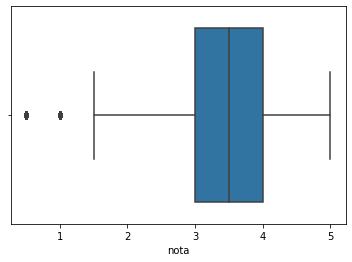

In [11]:
# Biblioteca de visualização utilizada
import seaborn as sns

# Mostra todas as informações resumidas no describe
sns.boxplot(notas.nota)

### Olhando os filmes listados

In [12]:
# Importando arquivo de dados dos filmes
filmes = pd.read_csv('ml-latest-small/movies.csv')

# Alterando o nome das colunas do DataFrame
filmes.columns = ['filmeId', 'titulo', 'genero']

# Imprimindo somente as 5 primeira linhas do DataFrame
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Analisando algumas notas especificas por filme

In [13]:
# Retornando todas as notas atribuidas para o filme Toy Story
# Formato em DataFrame
notas.query('filmeId==1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [14]:
# Retornando todas as notas atribuidas para o filme Toy Story
# Formato em Series
notas.query('filmeId==1').nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [15]:
# Retornando a média atribuida para o filme Toy Story
# Formato em Series
print('Nota média do filme Toy Story (1995):', notas.query('filmeId==1').nota.mean())

Nota média do filme Toy Story (1995): 3.9209302325581397


In [16]:
# Agrupando todos os filmes do DataFrame e mostrando a média de todos os filmes agrupados
# Desse modo que foi feito gera a média de todas as colunas
notas.groupby('filmeId').mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [17]:
# Gera uma Series somente com a colunas nota, gerando assim a média das notas
# E atribuimos o resultado a uma variável
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

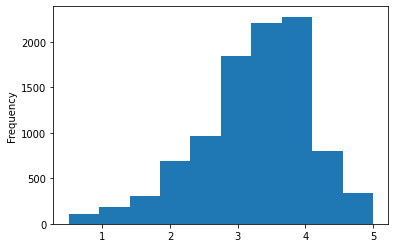

In [18]:
# Histograma usando o Pandas
medias_por_filme.plot(kind='hist')

<AxesSubplot:title={'center':'Histograma das médias dos filmes'}, ylabel='nota'>

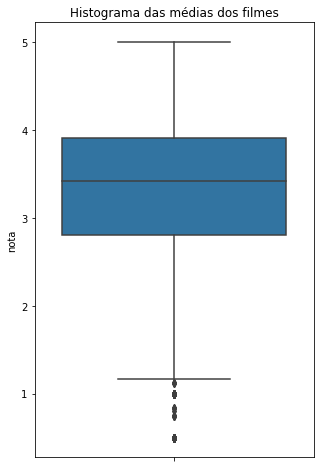

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
plt.title('Histograma das médias dos filmes')
sns.boxplot(y=medias_por_filme)

In [20]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/home/ana/myprojects/myprojects/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

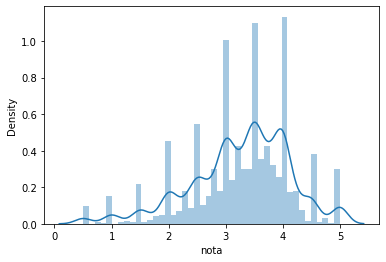

In [21]:
# Histograma usando a biblioteca Seaborn
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

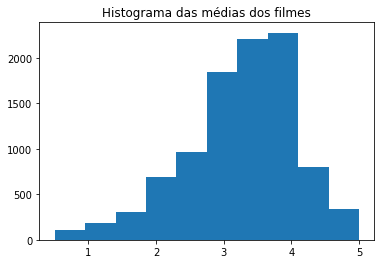

In [22]:
# Histograma usando o Marplotlib
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

### Analisando TMDB 5000 Movie Dataset - Kaggle

In [23]:
# Importando o arquivo e mostrando os 5 primeiros registros
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
# Retornando valores únicos de uma coluna do DataFrame
tmdb.original_language.unique()
# Nesse caso é uma variável categórica nominal (não possui ordem)
# Outro tipo de variável categórica são as ordinais (possuem ordem)

# Existem também as variáveis quantitativas
# Quantitativa -> Contínuo (valores decimais)
# Quantitativa -> Não contínuo (valores inteiros)

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [25]:
# Retornando valores únicos da coluna de médias
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [26]:
# Series com contando as linguas
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ar       2
ta       2
ro       2
te       1
hu       1
vi       1
pl       1
no       1
af       1
sl       1
xx       1
el       1
ky       1
ps       1
nb       1
is       1
tr       1
Name: original_language, dtype: int64

In [27]:
# Transformando as Series em um DataFrame
tmdb['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


In [28]:
# Transformando as Series em um DataFrame, transformando o index em coluna e renomeando
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


### Plots de categoria com Seaborn

<AxesSubplot:xlabel='original_language', ylabel='total'>

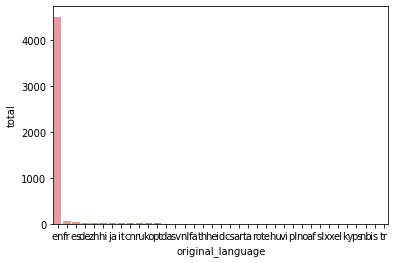

In [29]:
# Para plotar um gráfico da maneira abaixo não é possivel com uma Series, 
# precisamos transformar a Series em DataFrame
# Esse plot está ordenado porque foi feito nos passos anteriores
sns.barplot(x='original_language', y='total', data = contagem_de_lingua)

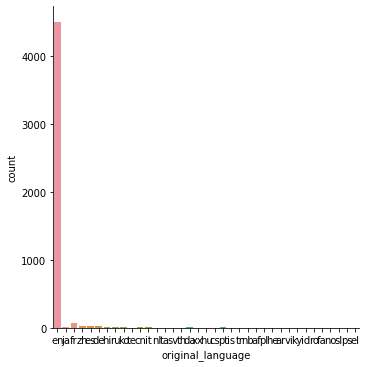

In [30]:
# Plot por categoria, nesse caso não é necessário fazer os passos anteriores
# de transformar a Series em DataFrame eajustar as colunas antes de plotar
# O kind é como o y do gráfico
# Esse plot não estar ordenado
sns.catplot(x = 'original_language', kind='count', data = tmdb)

([<matplotlib.patches.Wedge at 0x7f382e3aa5b0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

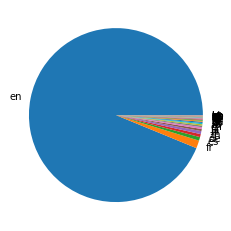

In [31]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

In [32]:
total_por_lingua = tmdb['original_language'].value_counts()

# Filtrando
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


<AxesSubplot:xlabel='lingua', ylabel='total'>

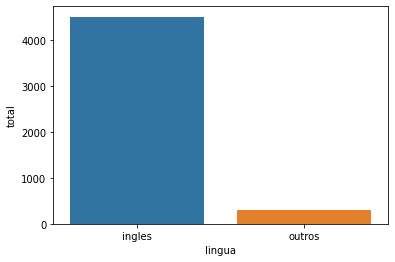

In [33]:
# Criando o DataFrame com os filtros feitos no passo anterior e plotando
# Estamos mostrando que existem mais filme em ingles que em outras linguas
dados = {
    'lingua':['ingles', 'outros'],
    'total':[total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x = 'lingua', y = 'total', data = dados)

([<matplotlib.patches.Wedge at 0x7f382e25ff10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

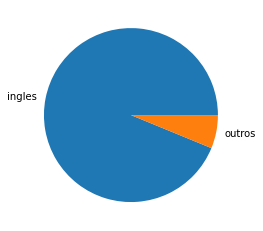

In [34]:
plt.pie(dados['total'], labels = dados['lingua'])

In [35]:
tf_others_language = tmdb.query('original_language != "en"').original_language.value_counts()
tf_others_language

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ro     2
ar     2
id     2
cs     2
ta     2
ps     1
vi     1
is     1
af     1
ky     1
nb     1
el     1
tr     1
sl     1
xx     1
pl     1
te     1
hu     1
no     1
Name: original_language, dtype: int64

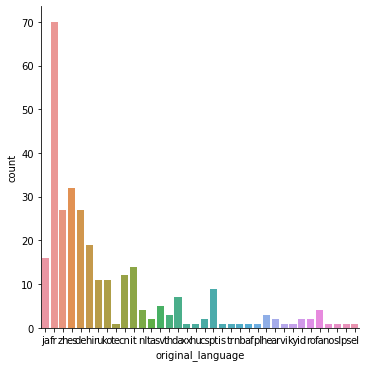

In [36]:
# ANTES

# Plotando as informações dos filmes sem a lingua original em ingles
tf_sem_en = tmdb.query('original_language != "en"')

sns.catplot(x = 'original_language', kind='count', data = tf_sem_en)

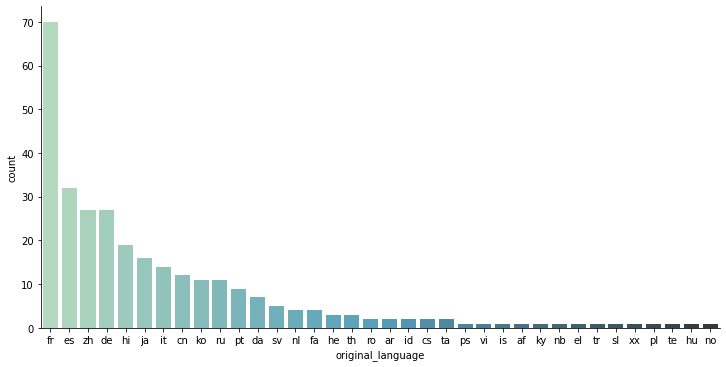

In [37]:
# DEPOIS

tf_sem_en = tmdb.query('original_language != "en"')

# Funções eixo e funções não eixos no Seaborn
# aspect alteramos para aumentar o tamanho do gráfico
sns.catplot(x = 'original_language', kind='count', data = tf_sem_en, 
            aspect=2, 
            palette='GnBu_d',
            order=tf_others_language.index)

### Exemplo de Gráfico Linear

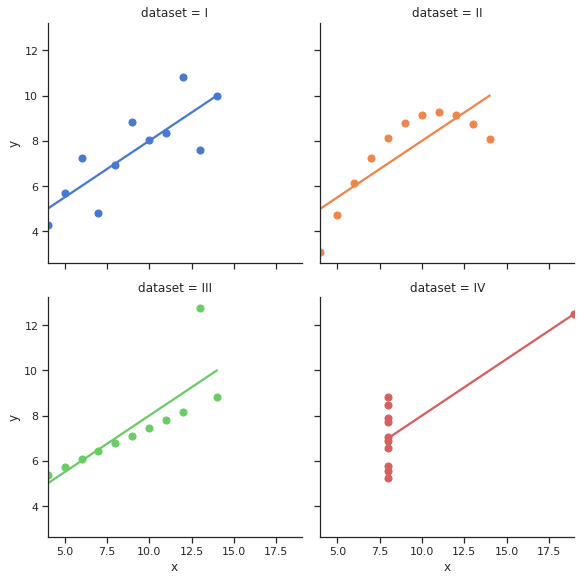

In [38]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

### Voltando a nossa análise

### Revisando o papel da média, mediana, medidas de tendênci central, dispersão, desvio padrão, box plot e histograma

In [39]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [40]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [41]:
# Veremos as notas e médias dos 2 primeiros filmes
notas_toy_story = notas.query('filmeId==1')
notas_jumanji = notas.query('filmeId==2')

# Imprimindo a quantidade dessas notas
print('Notas do Toy Story {toy} e do Jumanji {jum}.'.format(toy=len(notas_toy_story), 
                                                            jum=len(notas_jumanji)))

# Médias (%.2f e % conforme abaixo arredonda os decimais)
print('\nMédia dos dois filmes:')
print('\n>> Toy Story = %.2f' % notas_toy_story.nota.mean())
print('>> Jumanji = %.2f' % notas_jumanji.nota.mean())

# Mediana (%.2f e % conforme abaixo arredonda os decimais)
# Mediana é 50% pra cima e 50% pra baixo
print('\nMediana dos dois filmes:')
print('\n>> Toy Story = %.2f' % notas_toy_story.nota.median())
print('>> Jumanji = %.2f' % notas_jumanji.nota.median())

Notas do Toy Story 215 e do Jumanji 110.

Média dos dois filmes:

>> Toy Story = 3.92
>> Jumanji = 3.43

Mediana dos dois filmes:

>> Toy Story = 4.00
>> Jumanji = 3.50


{'whiskers': [<matplotlib.lines.Line2D at 0x7f382d981ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f382d98d220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f382d981730>,
 'medians': [<matplotlib.lines.Line2D at 0x7f382d98d940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f382d98dcd0>,
 'means': []}

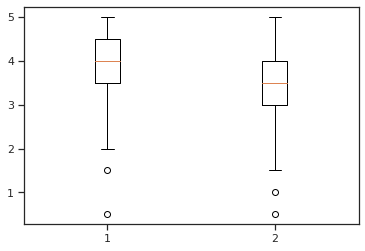

In [42]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

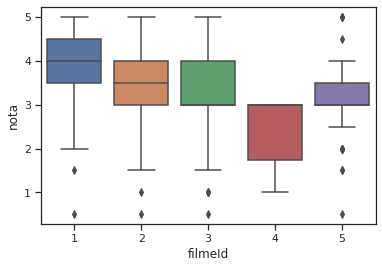

In [43]:
sns.boxplot(x = 'filmeId', y = 'nota', data = notas.query('filmeId in [1, 2, 3, 4, 5]'))

In [44]:
# Desvio Padrão
print('Desvio Padrão do Jumanji = {jum} e do Toy Story = {toy}.'.format(jum=notas_jumanji.nota.std(), 
                                                                    toy=notas_toy_story.nota.std()))

Desvio Padrão do Jumanji = 0.8817134921476455 e do Toy Story = 0.8348591407114047.
